# "Trading with Implied Volatility"
> "While looking at different daily variables"

- toc:true- branch: master
- badges: true
- comments: true
- author: Sebastian Soran
- categories: [fastpages, jupyter, openbb, pytrends]

Importing Necessary Libraries

In [ ]:
#Importing Libraries
import fred
import matplotlib.pyplot as plt
import pandas as pd
from openbb_terminal import api as openbb

Importing Dataframe with Pytrends

In [6]:
#Importing CSV
merged = pd.read_csv('/Users/sebastiansoran/PycharmProjects/sssssss/new_merged.csv')
new_df = merged.drop(columns= 'Unnamed: 0')
new_df['closing/searched'] = new_df['Closing']/new_df['homedepot']
new_df['date'] = pd.to_datetime(new_df['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              154 non-null    datetime64[ns]
 1   homedepot         154 non-null    int64         
 2   Closing           154 non-null    float64       
 3   Quarters          154 non-null    object        
 4   Volume            154 non-null    int64         
 5   closing/searched  154 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 7.3+ KB
None


In [7]:
#OpenBB - Download Greeks History as CSV
openbb.stocks.options.grhist(symbol = "HD", expiry = "2023-01-20", strike = 320, greek = "iv", export= "csv")

Saved file: /Users/sebastiansoran/PycharmProjects/sssssss/OpenBBTerminal/exports/stocks/options/screen/grhist_20220827_214044.csv

In [12]:
greeks = pd.read_csv('/Users/sebastiansoran/PycharmProjects/sssssss/OpenBBTerminal/exports/stocks/options/screen/grhist_20220827_214044.csv')
##Rename column 1 and change to date only 
greeks['Unnamed: 0'] = pd.to_datetime(greeks['Unnamed: 0'])
greeks.rename(columns={'Unnamed: 0': 'date'}, inplace= True)
greeks['date'] = greeks['date'].dt.date
greeks['date'] = pd.to_datetime(greeks['date'])
greeks = greeks.groupby('date')['iv','gamma','delta','theta','vega','premium','price'].mean()
greeks = greeks.reset_index(level=0)
greeks

,date,iv,gamma,delta,theta,vega,premium,price
0,2021-04-01,0.235560,0.004355,0.479930,-0.028314,1.460670,28.553233,307.837951
1,2021-04-06,0.233727,0.004293,0.506924,-0.028522,1.490580,31.455500,313.994341
2,2021-04-07,0.229521,0.004404,0.496975,-0.027880,1.482627,29.876167,312.176595
3,2021-04-08,0.226717,0.004430,0.507088,-0.027772,1.489970,30.665633,314.643306
4,2021-04-09,0.223989,0.004412,0.525859,-0.027686,1.503973,32.515100,318.934526
...,...,...,...,...,...,...,...,...
274,2022-08-12,0.270380,0.007024,0.488410,-0.068298,0.820862,18.913200,313.876755
275,2022-08-18,0.268431,0.006870,0.576941,-0.076169,0.821223,25.000600,324.725279
276,2022-08-22,0.270332,0.007333,0.486795,-0.075289,0.794827,18.260400,312.210000
277,2022-08-23,0.266517,0.007454,0.429819,-0.066983,0.764189,14.684400,306.680000


In [14]:
#Merge pycharm DF and OpenBB Option Greeks DF
search_and_greeks = pd.merge(greeks,new_df, on = 'date')
print(search_and_greeks)

##LIMITATION - TOO LITTLE DATES, GO BACK TO PYTRENDS AND TRY TO GATHER OLDER DATA FURTHER BACK FOR MORE ENTRIES

         date        iv     gamma     delta     theta      vega    premium  \
0  2022-01-10  0.272438  0.002610  0.781678 -0.035117  1.093703  79.616133   
1  2022-01-12  0.273567  0.002590  0.783231 -0.035275  1.088103  80.176667   
2  2022-01-13  0.278131  0.002583  0.779462 -0.036380  1.097137  80.197467   
3  2022-01-14  0.283735  0.002950  0.734088 -0.040467  1.177107  69.125467   
4  2022-01-18  0.271792  0.003217  0.722422 -0.039278  1.180990  63.539667   
..        ...       ...       ...       ...       ...       ...        ...   
67 2022-08-09  0.277186  0.006889  0.425409 -0.066146  0.791027  15.501767   
68 2022-08-10  0.266857  0.007113  0.471865 -0.066391  0.819002  17.820767   
69 2022-08-11  0.273738  0.006971  0.466697 -0.068012  0.813208  17.833600   
70 2022-08-12  0.270380  0.007024  0.488410 -0.068298  0.820862  18.913200   
71 2022-08-18  0.268431  0.006870  0.576941 -0.076169  0.821223  25.000600   

         price  homedepot  Closing Quarters   Volume  closing/s

In [15]:
##Create new Column if price was lower or higher than previous day
search_and_greeks['Closing_s'] = search_and_greeks['Closing'].shift(-1)
search_and_greeks['Volume_s'] = search_and_greeks['Volume'].shift(-1)
search_and_greeks['homedepot_s'] = search_and_greeks['homedepot'].shift(-1)


search_and_greeks['closing_price_higher'] = search_and_greeks['Closing'] < search_and_greeks['Closing_s']
search_and_greeks['volume_higher'] = search_and_greeks['Volume'] < search_and_greeks['Volume_s']
search_and_greeks['search_trends_higher'] = search_and_greeks['homedepot'] < search_and_greeks['homedepot_s']
print(search_and_greeks)

         date        iv     gamma     delta     theta      vega    premium  \
0  2022-01-10  0.272438  0.002610  0.781678 -0.035117  1.093703  79.616133   
1  2022-01-12  0.273567  0.002590  0.783231 -0.035275  1.088103  80.176667   
2  2022-01-13  0.278131  0.002583  0.779462 -0.036380  1.097137  80.197467   
3  2022-01-14  0.283735  0.002950  0.734088 -0.040467  1.177107  69.125467   
4  2022-01-18  0.271792  0.003217  0.722422 -0.039278  1.180990  63.539667   
..        ...       ...       ...       ...       ...       ...        ...   
67 2022-08-09  0.277186  0.006889  0.425409 -0.066146  0.791027  15.501767   
68 2022-08-10  0.266857  0.007113  0.471865 -0.066391  0.819002  17.820767   
69 2022-08-11  0.273738  0.006971  0.466697 -0.068012  0.813208  17.833600   
70 2022-08-12  0.270380  0.007024  0.488410 -0.068298  0.820862  18.913200   
71 2022-08-18  0.268431  0.006870  0.576941 -0.076169  0.821223  25.000600   

         price  homedepot  Closing Quarters   Volume  closing/s

In [524]:
##Supervised ML - KNN
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X = search_and_greeks[['volume_higher' ,'premium',"iv", 'homedepot']].values
y = search_and_greeks['closing_price_higher'].values


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, stratify= y)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.6363636363636364


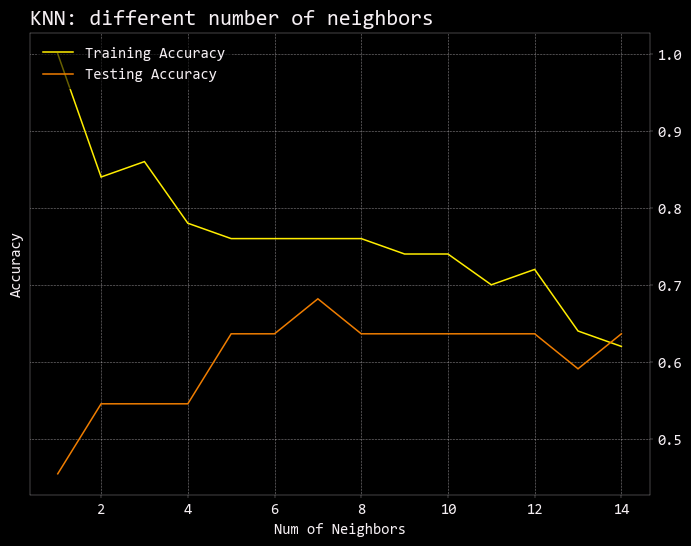

In [526]:
##Fitting and plotting
%matplotlib inline


train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,15)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
#Plotting accuracy
plt.figure(figsize = (8,6))
plt.title("KNN: different number of neighbors")
plt.plot(neighbors, train_accuracies.values(), label = 'Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Num of Neighbors')
plt.ylabel('Accuracy')
plt.show()

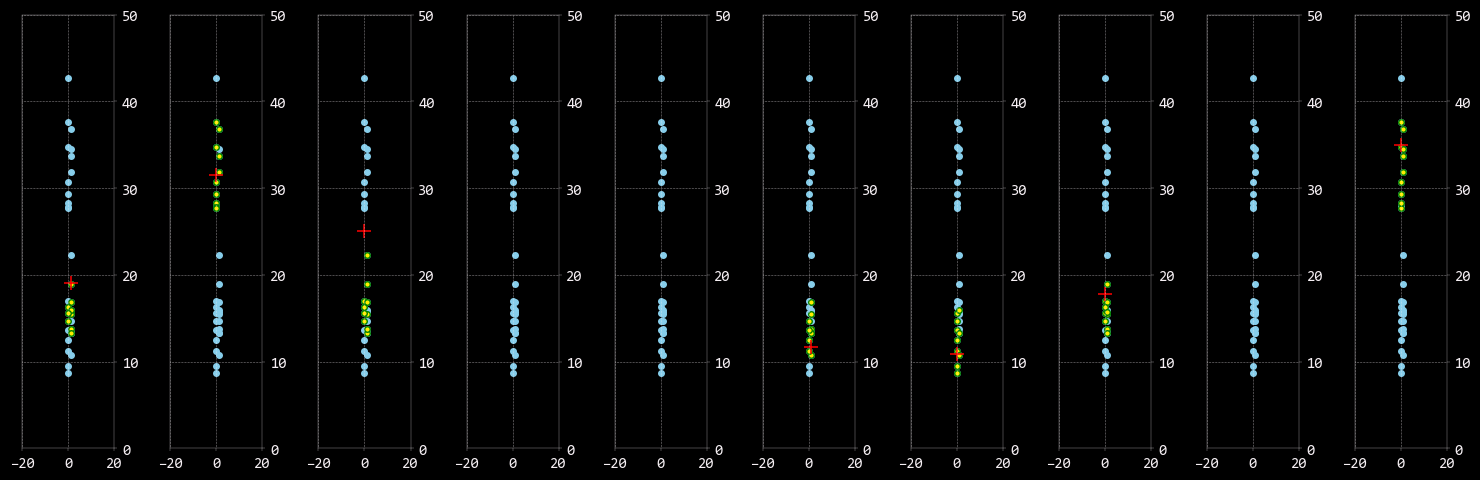

In [486]:
##Trying to visualize K nearest neighbors
def get_neighbors(X_train, sample, k=5):
    neighbors = [(x, np.sum(np.abs(x - sample))) for x in X_train]
    neighbors = sorted(neighbors, key=lambda x: x[1])
    return np.array([x for x, _ in neighbors[:k]])

_, ax = plt.subplots(nrows=1, ncols=10, figsize=(15, 5))
for i in range(10):
    sample = X_test[i]
    neighbors = get_neighbors(X_train, sample, k=10)
    ax[i].scatter(X_train[:, 0], X_train[:, 1], c="skyblue")
    ax[i].scatter(neighbors[:, 0], neighbors[:, 1], edgecolor="green")
    ax[i].scatter(sample[0], sample[1], marker="+", c="red", s=100)
    ax[i].set(xlim=(-20, 20), ylim=(0, 50))

plt.tight_layout()


In [1020]:
##Linear REGRESSION using all features of dataset
#OLS under the hood, showing R2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = search_and_greeks.drop(['iv','date','Quarters','Closing_s','Volume_s','homedepot_s','closing/searched'], axis = 1).values
y = search_and_greeks['iv'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)


###Not representative of the model's ability to generalize to unseen data, because its dependant on the way we split the data.
###Have to use cross validation 

0.9530073664842984

In [1009]:
#ROOT MEAN SQUARED ERROR (RMSE)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared = False)


 

0.6330473492851778

In [1010]:
##Cross Validation VERY IMPORTANT TO DO
##k-fold CV and model performance, however more folds is more computationally expensive

from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits= 5, shuffle=True)

reg = LinearRegression()
cv_result = cross_val_score(reg,X,y,cv=kf)
print(cv_result)
print(np.mean(cv_result), np.std(cv_result))
print(np.quantile(cv_result, [0.025,0.975]))


[0.9359104  0.57698279 0.92730994 0.9617947  0.97627895]
0.8756553553130848 0.1503657293971246
[0.6120155  0.97483052]


In [1011]:
##Regularized Regression
##Ridge Regression - penalizes large positive or negative coefficients

from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1,10,100,500,1000]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))
    
print(scores)

##Same Method

from sklearn.metrics import r2_score
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))


[0.1047314394571659, 0.12423506556693265, 0.18314904733749726, 0.2738256770518912, 0.24383086405199428, 0.1677605885939184]
0.00605667017621542
0.517401337257386
0.007867533073097755
0.1047314394571659


In [1012]:
#Ridge Regression

from sklearn.linear_model import Lasso
scores = []
for alpha in [0.001,.01,0.1, 1,10,20,50,100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))
    
print(scores)


[0.2888229271501861, 0.14072213552748347, 0.1047314394571659, 0.12423506556693265, 0.18314904733749726, 0.2065855258782523, 0.2436462082532973, 0.2738256770518912]


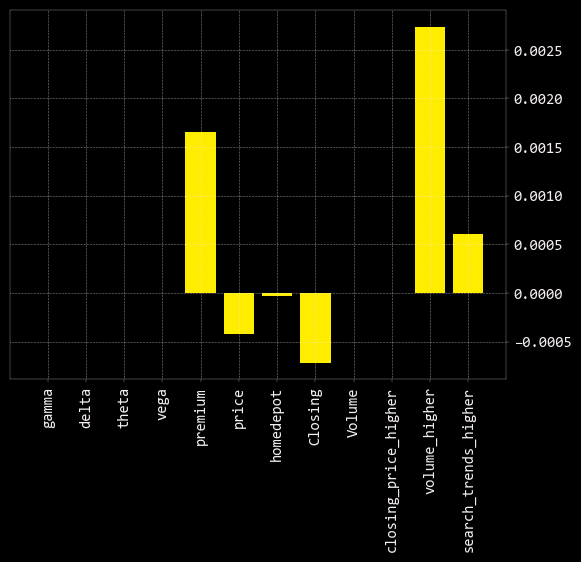

In [1021]:
##Lasso for feature selection
from sklearn.linear_model import Lasso

X = search_and_greeks.drop(['iv','date','Quarters','Closing_s','Volume_s','homedepot_s','closing/searched'], axis = 1).values
y = search_and_greeks['iv'].values
names = search_and_greeks.drop(['iv','date','Quarters','Closing_s','Volume_s','homedepot_s','closing/searched'], axis = 1).columns

lasso = Lasso(alpha = 0.0001)
lasso_coef = lasso.fit(X,y).coef_
plt.bar(names,lasso_coef)
plt.xticks(rotation = 90)
plt.show()

In [1088]:
##How to choose the right hyperparameters like alpha and n_neighbors

from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=4, shuffle= True)
param_grid = {'alpha': np.arange(0.0001,1,10), "solver": ['sag','lsqr']}

ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train,y_train)
print(ridge_cv.best_params_,ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.0001} -0.09270934040503556


In [1089]:
test_score = ridge_cv.score(X_test,y_test)
print(test_score)

0.001340380679800468
